# INF2178 Assignment 1
Samantha Chui (1002369126)


### Pre-Processing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import statistics

In [3]:
filepath = '/Users/schui/Documents/Master of Information/INF2178/'
df = pd.read_excel(filepath + 'INF2178_A1_data.xlsx')
shelter_df = df.copy() # make a copy of the df so that the original df remains untouched
shelter_df.head()

,OCCUPANCY_DATE,ORGANIZATION_NAME,PROGRAM_ID,PROGRAM_NAME,SECTOR,PROGRAM_MODEL,OVERNIGHT_SERVICE_TYPE,PROGRAM_AREA,SERVICE_USER_COUNT,CAPACITY_TYPE,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
0,2021-01-01,COSTI Immigrant Services,15371,COSTI North York West Hotel - Family Program,Families,Emergency,Motel/Hotel Shelter,COVID-19 Response,74,Room Based Capacity,NaN,NaN,29.0,26.0
1,2021-01-01,COSTI Immigrant Services,16211,COSTI North York West Hotel - Seniors Program,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,3,Room Based Capacity,NaN,NaN,3.0,3.0
2,2021-01-01,COSTI Immigrant Services,16192,COSTI North York West Hotel Program - Men,Men,Emergency,Motel/Hotel Shelter,COVID-19 Response,24,Room Based Capacity,NaN,NaN,28.0,23.0
3,2021-01-01,COSTI Immigrant Services,16191,COSTI North York West Hotel Program - Mixed Adult,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,25,Room Based Capacity,NaN,NaN,17.0,17.0
4,2021-01-01,COSTI Immigrant Services,16193,COSTI North York West Hotel Program - Women,Women,Emergency,Motel/Hotel Shelter,COVID-19 Response,13,Room Based Capacity,NaN,NaN,14.0,13.0


In [4]:
# check column types
shelter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50944 entries, 0 to 50943
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   OCCUPANCY_DATE          50944 non-null  datetime64[ns]
 1   ORGANIZATION_NAME       50944 non-null  object        
 2   PROGRAM_ID              50944 non-null  int64         
 3   PROGRAM_NAME            50909 non-null  object        
 4   SECTOR                  50944 non-null  object        
 5   PROGRAM_MODEL           50942 non-null  object        
 6   OVERNIGHT_SERVICE_TYPE  50942 non-null  object        
 7   PROGRAM_AREA            50942 non-null  object        
 8   SERVICE_USER_COUNT      50944 non-null  int64         
 9   CAPACITY_TYPE           50944 non-null  object        
 10  CAPACITY_ACTUAL_BED     32399 non-null  float64       
 11  OCCUPIED_BEDS           32399 non-null  float64       
 12  CAPACITY_ACTUAL_ROOM    18545 non-null  float6

In [5]:
# change 'PROGRAM_ID' into type str for easier extraction
# (since it's a unique identifier and we won't be doing any calculations with it)

shelter_df['PROGRAM_ID'] = shelter_df['PROGRAM_ID'].astype(str)
shelter_df['PROGRAM_ID'].info() # confirm change was made

<class 'pandas.core.series.Series'>
RangeIndex: 50944 entries, 0 to 50943
Series name: PROGRAM_ID
Non-Null Count  Dtype 
--------------  ----- 
50944 non-null  object
dtypes: object(1)
memory usage: 398.1+ KB


In [6]:
# count the number of unique values in each 'category' type column
# a column is a category type if it distinguishes the specific program
# these columns all happen to be non-numerical values

# create function
def unique_categories(df):
    print('Number of Unique Categories in a Column:')
    for column, values in df.transpose().iterrows(): # for each column
        if (df.dtypes[column] != 'float64') and (df.dtypes[column] != 'int64'):
            print(column, ': ', str(df[column].nunique()), sep='')


# call on function
unique_categories(shelter_df)

Number of Unique Categories in a Column:
OCCUPANCY_DATE: 365
ORGANIZATION_NAME: 35
PROGRAM_ID: 169
PROGRAM_NAME: 167
SECTOR: 5
PROGRAM_MODEL: 2
OVERNIGHT_SERVICE_TYPE: 7
PROGRAM_AREA: 4
CAPACITY_TYPE: 2


### Bed vs. Room Occupancy

##### Exploratory Data Analysis

In [7]:
# filter df to contain only bed based capacity
bed_df = shelter_df[shelter_df['CAPACITY_TYPE'] == 'Bed Based Capacity'].copy()

# drop unecessary columns: we only care about the date and bed capacity & occupancy
bed_df = bed_df[['OCCUPANCY_DATE', 'OCCUPIED_BEDS', 'CAPACITY_ACTUAL_BED']]
bed_df.reset_index(drop=True, inplace=True) # reset index

# calculate bed occupancy rate
bed_df['OCCUPANCY_RATE'] = bed_df['OCCUPIED_BEDS'] / bed_df['CAPACITY_ACTUAL_BED']

bed_df

,OCCUPANCY_DATE,OCCUPIED_BEDS,CAPACITY_ACTUAL_BED,OCCUPANCY_RATE
0,2021-01-01,6.0,8.0,0.750000
1,2021-01-01,22.0,24.0,0.916667
2,2021-01-01,8.0,12.0,0.666667
3,2021-01-01,10.0,12.0,0.833333
4,2021-01-01,11.0,12.0,0.916667
...,...,...,...,...
32394,2021-12-31,6.0,20.0,0.300000
32395,2021-12-31,23.0,23.0,1.000000
32396,2021-12-31,13.0,14.0,0.928571
32397,2021-12-31,10.0,10.0,1.000000


In [18]:
# get summary statistics of bed occupancy rate

# create function
def get_stats(df):
  mean = np.round(np.mean(df), 2)
  median = np.round(np.median(df), 2)
  min_value = np.round(df.min(), 2)
  max_value = np.round(df.max(), 2)
  quartile_1 = np.round(df.quantile(0.25), 2)
  quartile_3 = np.round(df.quantile(0.75), 2)

  print('Mean: %s' % mean)
  print('Median: %s' % median)
  print('Min Value: %s' % min_value)
  print('Max Value: %s' % max_value)
  print('25th Quartile: %s' % quartile_1)
  print('75th Quartile: %s' % quartile_3)

# call on function
print('Bed Occupancy Rate Summary Statistics:')
get_stats(bed_df['OCCUPANCY_RATE'])

Bed Occupancy Rate Summary Statistics:
Mean: 0.93
Median: 1.0
Min Value: 0.02
Max Value: 1.0
25th Quartile: 0.9
75th Quartile: 1.0


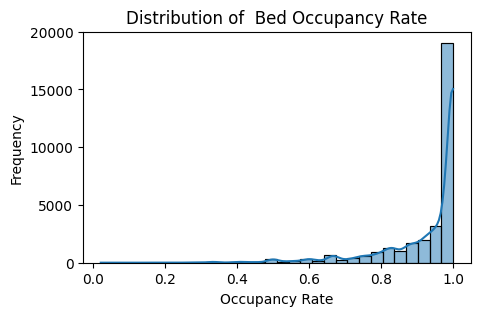

In [11]:
# visualize the data as a histogram

plt.figure(figsize=(5, 3))

sns.histplot(bed_df['OCCUPANCY_RATE'], bins=30, kde=True)

plt.title('Distribution of  Bed Occupancy Rate')
plt.xlabel('Occupancy Rate')
plt.ylabel('Frequency')

plt.show()

# data is highly skewed, therefore median should be used to calculate daily occupancy rate

In [9]:
# calculate daily median bed occupancy
daily_beds = bed_df.pivot_table(values='OCCUPANCY_RATE', aggfunc='median', index='OCCUPANCY_DATE')
daily_beds

,OCCUPANCY_RATE
OCCUPANCY_DATE,
2021-01-01,1.000000
2021-01-02,1.000000
2021-01-03,1.000000
2021-01-04,0.989618
2021-01-05,0.979779
...,...
2021-12-27,1.000000
2021-12-28,1.000000
2021-12-29,1.000000


In [10]:
# filter df to contain only room based capacity
room_df = shelter_df[shelter_df['CAPACITY_TYPE'] == 'Room Based Capacity'].copy()

# drop unecessary columns: we only care about the date and bed capacity & occupancy
room_df = room_df[['OCCUPANCY_DATE', 'OCCUPIED_ROOMS', 'CAPACITY_ACTUAL_ROOM']]
room_df.reset_index(drop=True, inplace=True) # reset index

# calculate bed occupancy rate
room_df['OCCUPANCY_RATE'] = room_df['OCCUPIED_ROOMS'] / room_df['CAPACITY_ACTUAL_ROOM']

room_df

,OCCUPANCY_DATE,OCCUPIED_ROOMS,CAPACITY_ACTUAL_ROOM,OCCUPANCY_RATE
0,2021-01-01,26.0,29.0,0.896552
1,2021-01-01,3.0,3.0,1.000000
2,2021-01-01,23.0,28.0,0.821429
3,2021-01-01,17.0,17.0,1.000000
4,2021-01-01,13.0,14.0,0.928571
...,...,...,...,...
18540,2021-12-31,128.0,128.0,1.000000
18541,2021-12-31,76.0,76.0,1.000000
18542,2021-12-31,3.0,3.0,1.000000
18543,2021-12-31,22.0,23.0,0.956522


In [19]:
# get summary statistics of room occupancy rate
print('Room Occupancy Rate Summary Statistics:')
get_stats(room_df['OCCUPANCY_RATE'])

Room Occupancy Rate Summary Statistics:
Mean: 0.93
Median: 1.0
Min Value: 0.01
Max Value: 1.01
25th Quartile: 0.96
75th Quartile: 1.0


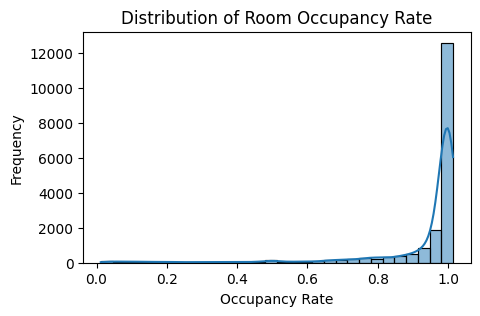

In [12]:
# visualize the data as a histogram

plt.figure(figsize=(5, 3))

sns.histplot(room_df['OCCUPANCY_RATE'], bins=30, kde=True)

plt.title('Distribution of Room Occupancy Rate')
plt.xlabel('Occupancy Rate')
plt.ylabel('Frequency')

plt.show()

# data is highly skewed, therefore median should be used to calculate daily occupancy rate

In [14]:
# calculate daily median room occupancy
daily_rooms = room_df.pivot_table(values='OCCUPANCY_RATE', aggfunc='median', index='OCCUPANCY_DATE')
daily_rooms

,OCCUPANCY_RATE
OCCUPANCY_DATE,
2021-01-01,1.000000
2021-01-02,1.000000
2021-01-03,1.000000
2021-01-04,0.995238
2021-01-05,1.000000
...,...
2021-12-27,1.000000
2021-12-28,1.000000
2021-12-29,1.000000


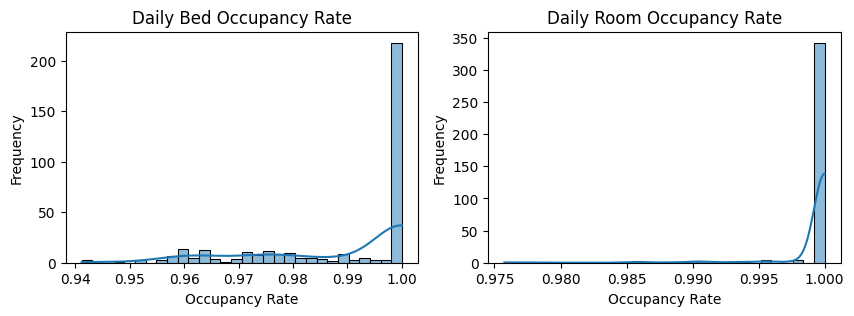

In [36]:
# plot final sample of bed and room occupancy as a histogram side by side

fig, ax = plt.subplots(1, 2, figsize=[10, 3])

# Bed Based Capacity
sns.histplot(daily_beds['OCCUPANCY_RATE'], bins=30, kde=True, ax=ax[0])
ax[0].set_title('Daily Bed Occupancy Rate')
ax[0].set_xlabel('Occupancy Rate')
ax[0].set_ylabel('Frequency')

# Room Based Capacity
sns.histplot(daily_rooms['OCCUPANCY_RATE'], bins=30, kde=True, ax=ax[1])
ax[1].set_title('Daily Room Occupancy Rate')
ax[1].set_xlabel('Occupancy Rate')
ax[1].set_ylabel('Frequency')

plt.show()

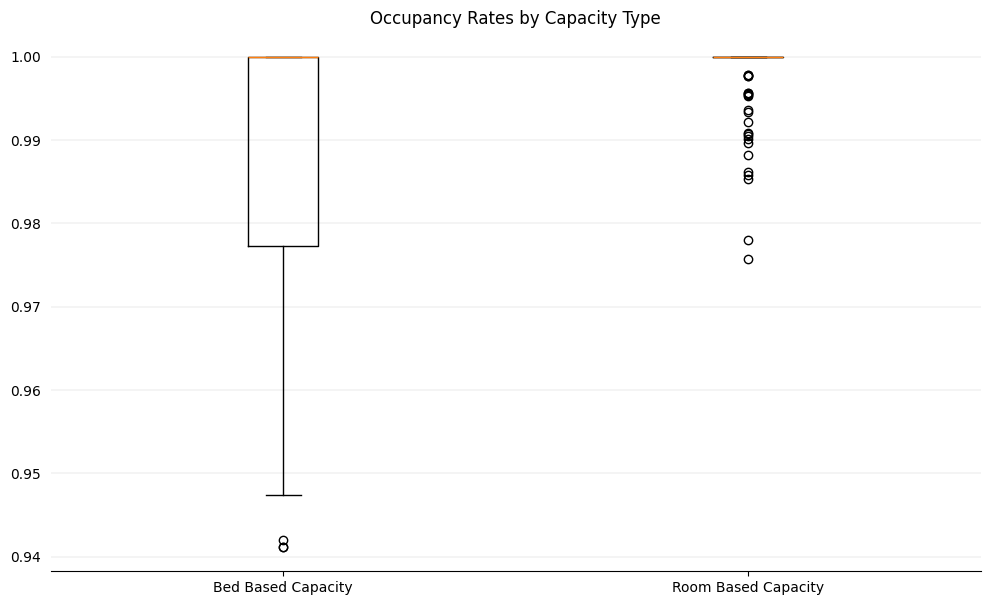

In [22]:
# plot bed vs. room occupancy as a boxplot

fig, ax = plt.subplots(figsize=[12, 7])

# hide lines of the chart
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.yaxis.set_ticks_position('none') # remove ticks

ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5) # show horizontal grid lines

ax.set_title('Occupancy Rates by Capacity Type')

dataset = [daily_beds['OCCUPANCY_RATE'], daily_rooms['OCCUPANCY_RATE']]

capacity_type = shelter_df['CAPACITY_TYPE'].unique().tolist() # extract the different types of shelter capacity categorizations
capacity_type.sort() # organize alphabetically

ax.boxplot(dataset, labels=capacity_type)

plt.show()

#### T-Test
A Welch's T-Test is conducted since the two groups do not have equal variance

In [40]:
# Calculate t-statistic and p-value
def welchs_ttest(x, y, a=0.05):
    t_stats, p_val = stats.ttest_ind(x, y, equal_var=False)
    if p_val <= a:
        result = 'reject'
    else:
        result = 'accept'
    print('T-Statistic: %s' % t_stats)
    print('P-Value: %s' % p_val)
    print('We %s the null hypothesis.' % result)

welchs_ttest(daily_beds['OCCUPANCY_RATE'], daily_rooms['OCCUPANCY_RATE'])


T-Statistic: -12.600199631576169
P-Value: 1.0402130955387886e-30
We reject the null hypothesis.


### Number of Users: City of Toronto vs. COSTI

##### Exploratory Data Analysis

In [49]:
# filter df to contain only data from City of Toronto
toronto_df = shelter_df[shelter_df['ORGANIZATION_NAME'] == 'City of Toronto'].copy()
toronto_df

# drop unnecessary columns
toronto_df = toronto_df[['OCCUPANCY_DATE', 'SERVICE_USER_COUNT']]
toronto_df.reset_index(drop=True, inplace=True)

# calculate daily total users
daily_toronto = toronto_df.pivot_table(values='SERVICE_USER_COUNT', aggfunc='sum', index='OCCUPANCY_DATE')
daily_toronto

,SERVICE_USER_COUNT
OCCUPANCY_DATE,
2021-01-01,1441
2021-01-02,1433
2021-01-03,1431
2021-01-04,1433
2021-01-05,1441
...,...
2021-12-27,1767
2021-12-28,1773
2021-12-29,1775


In [52]:
# get summary statistics
print('City of Toronto Users Summary Statistics:')
get_stats(daily_toronto['SERVICE_USER_COUNT'])

City of Toronto Users Summary Statistics:
Mean: 1497.37
Median: 1471.0
Min Value: 1378
Max Value: 1775
25th Quartile: 1426.0
75th Quartile: 1527.0


In [50]:
# filter df to contain only data from COSTI
costi_df = shelter_df[shelter_df['ORGANIZATION_NAME'] == 'COSTI Immigrant Services'].copy()
costi_df

# drop unnecessary columns
costi_df = costi_df[['OCCUPANCY_DATE', 'SERVICE_USER_COUNT']]
costi_df.reset_index(drop=True, inplace=True)

# calculate daily total users
daily_costi = costi_df.pivot_table(values='SERVICE_USER_COUNT', aggfunc='sum', index='OCCUPANCY_DATE')
daily_costi

,SERVICE_USER_COUNT
OCCUPANCY_DATE,
2021-01-01,395
2021-01-02,402
2021-01-03,404
2021-01-04,417
2021-01-05,422
...,...
2021-12-27,746
2021-12-28,744
2021-12-29,742


In [53]:
# get summary statistics
print('COSTI Users Summary Statistics:')
get_stats(daily_costi['SERVICE_USER_COUNT'])

COSTI Users Summary Statistics:
Mean: 495.48
Median: 484.0
Min Value: 318
Max Value: 747
25th Quartile: 374.0
75th Quartile: 556.0


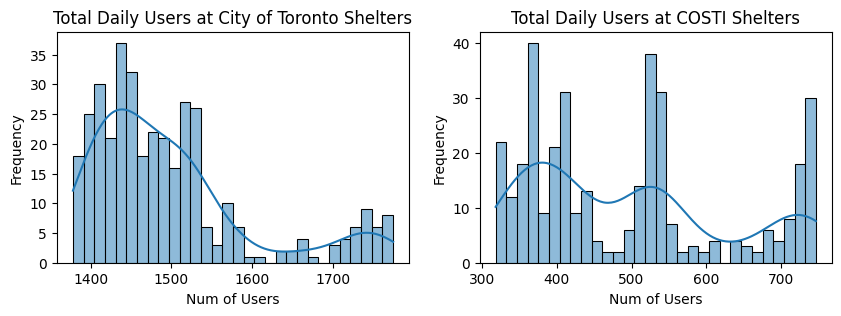

In [51]:
# visualize distribution of service users as a histogram

fig, ax = plt.subplots(1, 2, figsize=[10, 3])

# Bed Based Capacity
sns.histplot(daily_toronto['SERVICE_USER_COUNT'], bins=30, kde=True, ax=ax[0])
ax[0].set_title('Total Daily Users at City of Toronto Shelters')
ax[0].set_xlabel('Num of Users')
ax[0].set_ylabel('Frequency')

# Room Based Capacity
sns.histplot(daily_costi['SERVICE_USER_COUNT'], bins=30, kde=True, ax=ax[1])
ax[1].set_title('Total Daily Users at COSTI Shelters')
ax[1].set_xlabel('Num of Users')
ax[1].set_ylabel('Frequency')

plt.show()

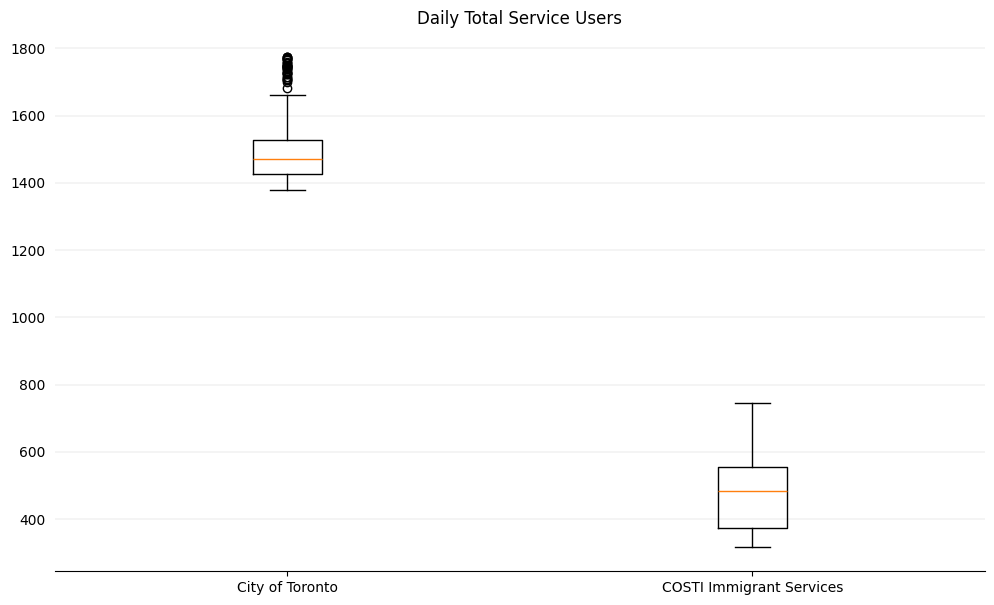

In [60]:
# plot Toronto vs. COSTI users as a boxplot

fig, ax = plt.subplots(figsize=[12, 7])

# hide lines of the chart
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.yaxis.set_ticks_position('none') # remove ticks

ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5) # show horizontal grid lines

ax.set_title('Daily Total Service Users')

dataset = [daily_toronto['SERVICE_USER_COUNT'], daily_costi['SERVICE_USER_COUNT']]

ax.boxplot(dataset, labels=['City of Toronto', 'COSTI Immigrant Services'])

plt.show()

In [59]:
welchs_ttest(daily_toronto['SERVICE_USER_COUNT'], daily_costi['SERVICE_USER_COUNT'])

T-Statistic: 114.74917804584445
P-Value: 0.0
We reject the null hypothesis.
